### Slalom Problem

In [21]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import pdb

#### Here, we give you the inputs for the problem : the x, y, and c coordinates as given in the problem statement (refer to the table)

In [7]:
x0, y0 = 0, 4
x1, y1, c1 = 4, 5, 3
x2, y2, c2 = 8, 4, 2
x3, y3, c3 = 12, 6, 2
x4, y4, c4 = 16, 5, 1
x5, y5, c5 = 20, 7, 2
x6, y6 = 24, 4

xs = [x0,x1,x2,x3,x4,x5,x6]
ys = [y0,y1,y2,y3,y4,y5,y6]
cs = [0,c1,c2,c3,c4,c5,0]

#### Initialize the variables we are optimizing over here! You should be using cvx.Variable() to create the variables you are optimizing over.

In [42]:
# Initialize any and all cvxpy variables that you will use
y = cp.Variable(7)

In [43]:
# Now, we put in our constraints: the format should be as follows.

constraints = [y[i] >= ys[i]-cs[i]/2 for i in range(7)] + [y[i] <= ys[i]+cs[i]/2 for i in range(7)]
# constraints = [
#     # constraint 1,
#     y[0] >= y0-c0/2
#     # constraint 2,
#     # etc.
# ]

In [44]:
# Here, input your objective function. It should be of the form:
def objective_fn(y):
    return sum((xs[i+1]-xs[i])**2 + (y[i+1]-y[i])**2 for i in range(6))

# cp.norm(cp.vstack([x[1]-x[0],y[1]-y[0]]),2)

# obj = cp.Minimize( YOUR OBJECTIVE FUNCTION HERE )
obj = cp.Minimize(objective_fn(y))

In [45]:
# creating the optimization problem here, putting together the objective and the constraints
prob = cp.Problem(obj, constraints)

optimal_path_length = prob.solve() # this will output your optimal path length

##### Just check that your optimization variables respect the constraints here (OPTIONAL, but good for debugging)

### Print out the coordinates of the path (this should be an array with 7 tuples denoting the (x,y) position of where the skiier should cross

In [47]:
# path = [(x0,y0), ..., (x6,y6)]
path = [(xs[i],y[i].value) for i in range(7)]

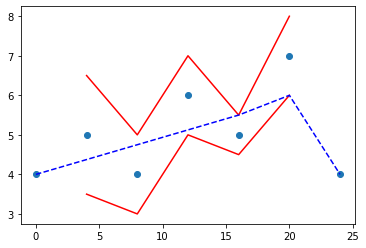

In [48]:
x = np.array([x0, x1, x2, x3, x4, x5, x6])
y = np.array([y0, y1, y2, y3, y4, y5, y6])
c = np.array([c1, c2, c3, c4, c5])
plt.figure()
plt.scatter(x,y)
plt.plot(x[1:-1], y[1:-1]+c/2, c="r")
plt.plot(x[1:-1], y[1:-1]-c/2, c="r")
plt.plot(*zip(*path), "b--")

In [49]:
print("{0:<3} {1:<3}".format("x", "y"))
for p in path:
    print("{0:<3} {1:.3f}".format(p[0], p[1]))

x   y  
0   4.000
4   4.375
8   4.750
12  5.125
16  5.500
20  6.000
24  4.000
